# Medical Costs

## Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
style.use('fivethirtyeight')

# Dataset

In [2]:
medical_DF = pd.read_csv("../input/insurance/insurance.csv")

In [3]:
medical_DF.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
medical_DF.shape

(1338, 7)

# Data Preparation

## Checking for Missing values

In [5]:
medical_DF.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in each column.

# Exploratory Data Analysis

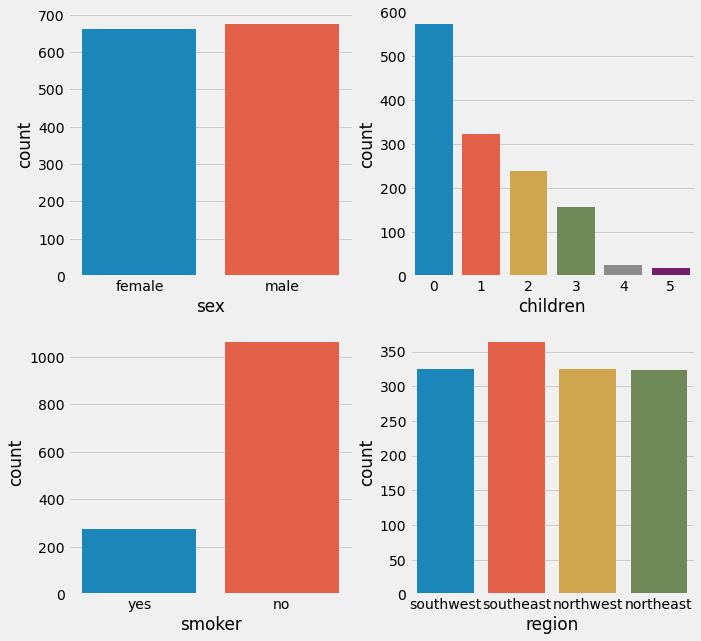

In [6]:
f, ax1 = plt.subplots(2, 2, figsize = (10,10))
sns.countplot(data = medical_DF, x = "sex", ax = ax1[0,0])
sns.countplot(data = medical_DF, x = "children", ax = ax1[0,1])
sns.countplot(data = medical_DF, x = "smoker", ax = ax1[1,0])
sns.countplot(data = medical_DF, x = "region", ax = ax1[1,1])
plt.show()

In [7]:
medical_DF['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

* **Sex**: The amount of males and females are almost equal. 50.5% of all beneficiaries are male.
* **Children**: 42.9% of all insurance holders have no children. 
* **Smoker**: 79.5% of all beneficiaries are non-smokers.
* **Region**: The distribution of regions are almost equal, with the South-East region having the most beneficiaries.

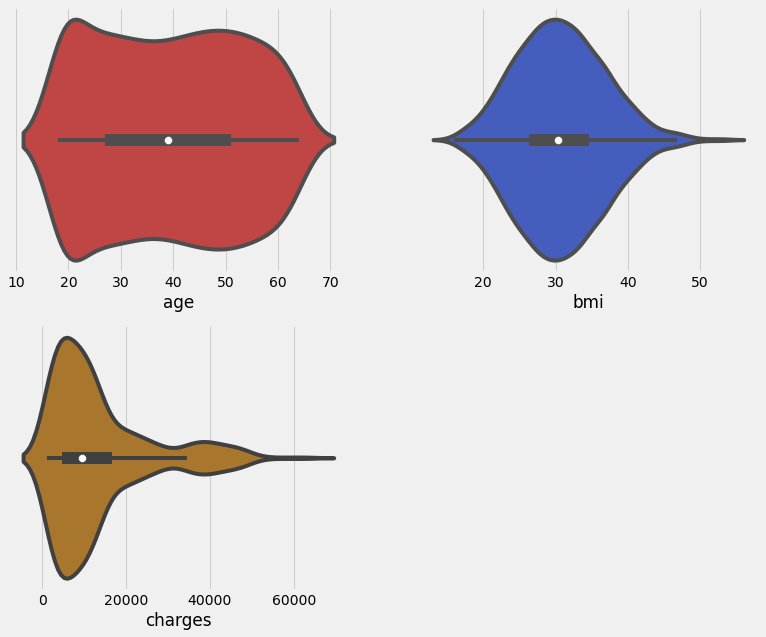

In [8]:
f, ax2 = plt.subplots(2, 2, figsize = (12,10))
sns.violinplot(data = medical_DF, x = "age", ax = ax2[0,0], color = '#d43131')
sns.violinplot(data = medical_DF, x = "bmi", ax = ax2[0,1], color = '#3152d2')
sns.violinplot(data = medical_DF, x = "charges", ax = ax2[1,0], color = '#bd7a17')
f.delaxes(ax = ax2[1,1])
plt.show()

In [9]:
medical_DF[['age', 'bmi', 'charges']].describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


* Age: The average age is 39.2 years. The median age is 39 years. The lowest recorded is 18 and the highest is 64. There is a huge distribution of beneficiaries between the ages 20 and 30.
* BMI: The average BMI is 30.66. The median BMI is 30.4. The lowest recorded BMI is 15.96 while the highest recorded BMI is 53.13.
* Charges: The average medical cost is 13,270.42 US dollars. The median medical cost is 9382.03 dollars. The minimum medical cost is 1121.87 dollars. The maximum is 63,770.43 dollars.

## Medical Charges in terms of Sex

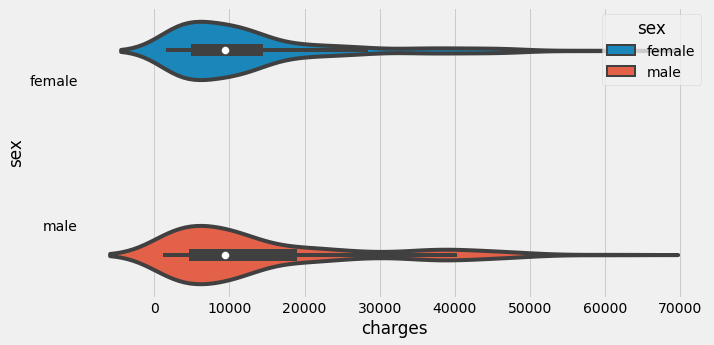

In [53]:
plt.figure(figsize = (10,5))
sns.violinplot(data = medical_DF, x = "charges", y = "sex", hue = "sex")
plt.show()

In [52]:
medical_DF.groupby(['sex']).describe()['charges']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


The median medical charges for females are slightly higher than males. However, the average medical costs for males are slightly higher. 

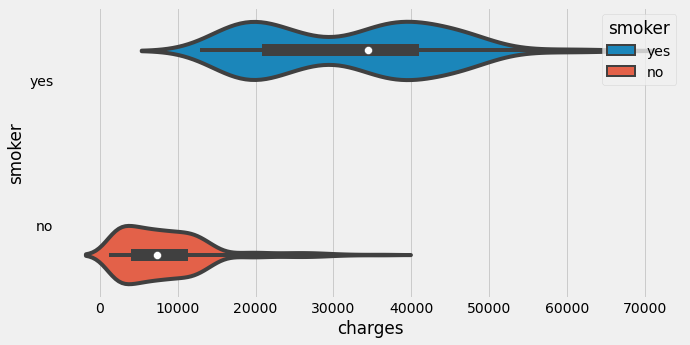

In [55]:
plt.figure(figsize = (10,5))
sns.violinplot(data = medical_DF, x = "charges", y = "smoker", hue = "smoker")
plt.show()

In [54]:
medical_DF.groupby(['smoker']).describe()['charges']

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


The medical charges for smokers are significantly higher. The average medical cost for smokers is 32,050.23 dollars whereas the average cost for non-smokers is 8434.27 dollars. The minimum medical cost for a non-smoker is 1121.87 dollars while it is 12,829.46 for smokers. The highest cost incurred by a non-smoker is 36,910.61 dollars while the highest bill incurred by a smoker is 63,770.43 dollars.

## Medical Charges in terms of Region

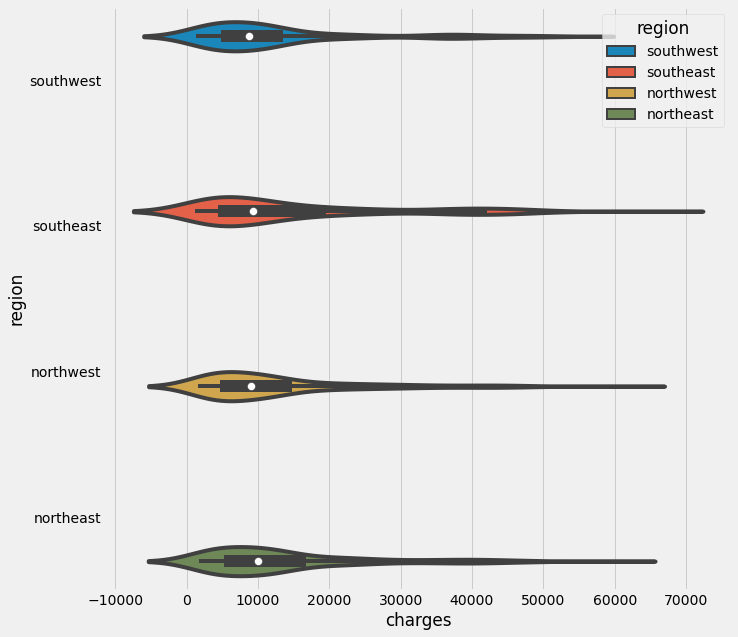

In [63]:
plt.figure(figsize = (10,10))
sns.violinplot(data = medical_DF, x = "charges", y = "region", hue = "region")
plt.show()

In [64]:
medical_DF.groupby(['region']).describe()['charges']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


The South-East region has the highest average medical costs while the South-West region has the lowest average medical costs. The North-East region has the highest median medical cost while the South-West region has the lowest median medical cost.

## Medical Charges in terms of Number of Children

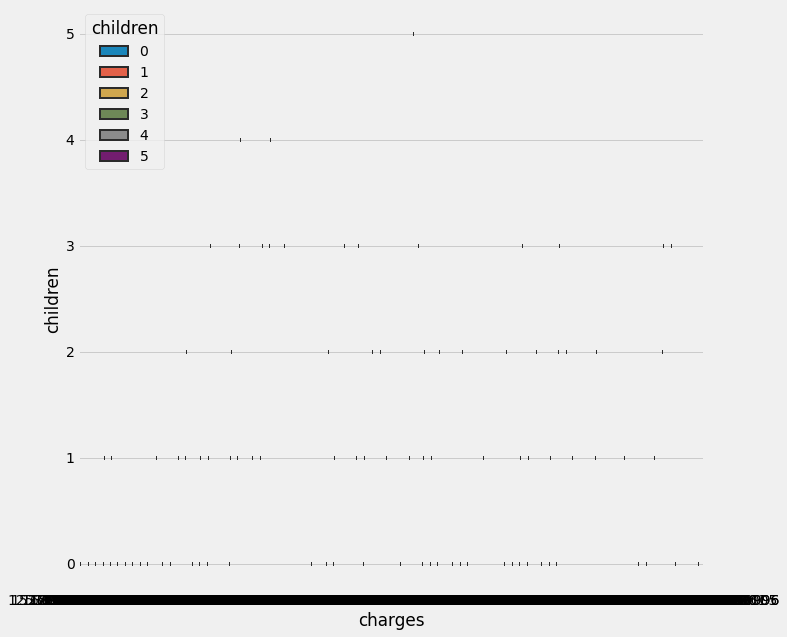

In [65]:
plt.figure(figsize = (10,10))
sns.violinplot(data = medical_DF, x = "charges", y = "children", hue = "children")
plt.show()

In [66]:
medical_DF.groupby(['children']).describe()['charges']

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


Beneficiaries with 4 children have the highest median medical charges while beneficiaries with 1 child have the lowest median medical charges. Beneficiaries with 5 children have the lowest average medical costs (which can be attributed to their small population) while beneficiaries with 3 children have the highest average medical bills.

## Medical Charges vs BMI

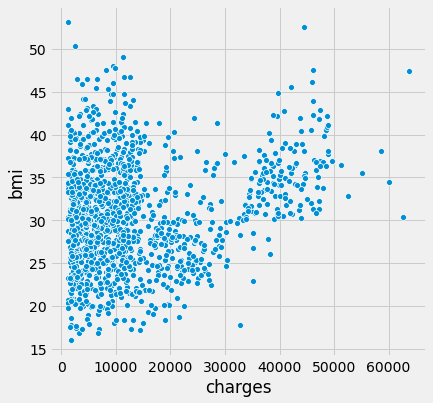

In [73]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = medical_DF, x = "charges", y = "bmi")
plt.show()

There is no strong correlation between the medical charges and the BMI of the beneficiaries.

## Medical Charges vs Age

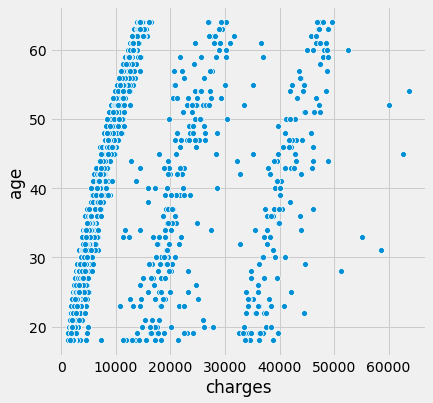

In [72]:
plt.figure(figsize = (6,6))
sns.scatterplot(data = medical_DF, x = "charges", y = "age")
plt.show()

There is no strong correlation between the medical charges and the age of the beneficiaries.

# Dummy Variables

There are many categorical features in this dataset. To perform regression, I will convert them to dummy variables.

In [10]:
medical_DF_1 = medical_DF

In [11]:
medical_DF_1 = pd.get_dummies(medical_DF, columns = ['region', 'children', 'sex'])
medical_DF_1.drop(columns = ['sex_female'], inplace = True)
medical_DF_1["smoker"].replace({"yes": 1, "no": 0}, inplace=True)

In [12]:
medical_DF_1.head(10)

,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,sex_male
0,19,27.900,1,16884.92400,0,0,0,1,1,0,0,0,0,0,0
1,18,33.770,0,1725.55230,0,0,1,0,0,1,0,0,0,0,1
2,28,33.000,0,4449.46200,0,0,1,0,0,0,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,0,1,0,0,0,0,0,1
4,32,28.880,0,3866.85520,0,1,0,0,1,0,0,0,0,0,1
5,31,25.740,0,3756.62160,0,0,1,0,1,0,0,0,0,0,0
6,46,33.440,0,8240.58960,0,0,1,0,0,1,0,0,0,0,0
7,37,27.740,0,7281.50560,0,1,0,0,0,0,0,1,0,0,0
8,37,29.830,0,6406.41070,1,0,0,0,0,0,1,0,0,0,1
9,60,25.840,0,28923.13692,0,1,0,0,1,0,0,0,0,0,0


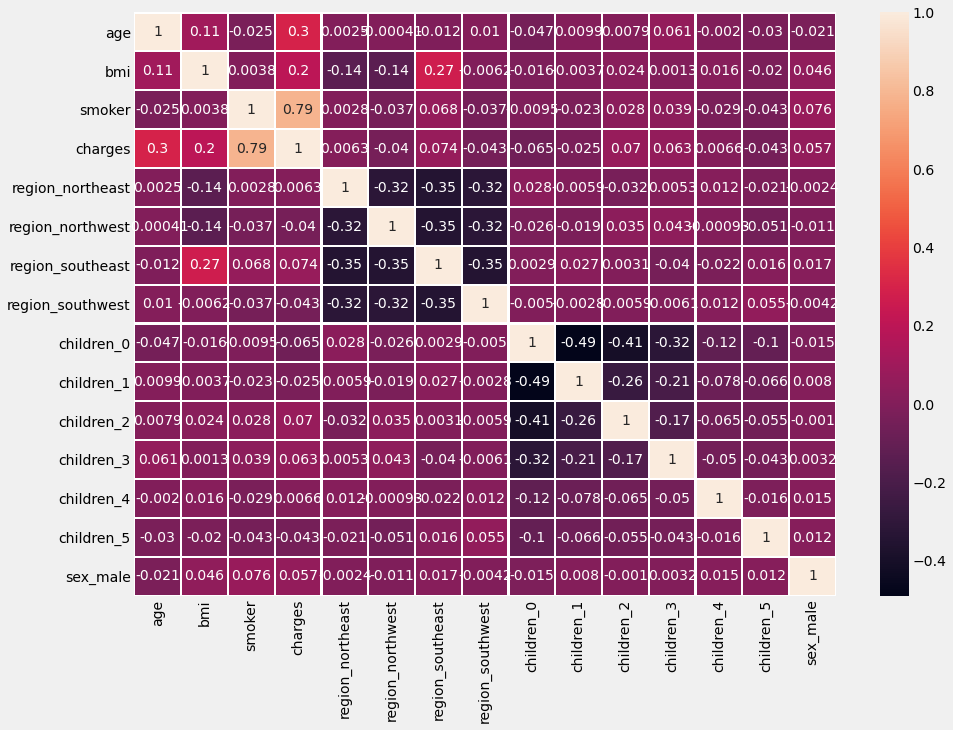

In [13]:
med_corr = medical_DF_1.corr()
plt.figure(figsize = (14,10))
sns.heatmap(med_corr, annot = True, linewidths = 1.2, linecolor = 'white')
plt.show()

As seen in the correlogram above, being a smoker has a high correlation to medical charges.

# Normalization

Normalization scales the data in such a way that the values range from 0 to 1.

In [14]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

medical_DF_1["age"] = NormalizeData(medical_DF_1["age"])
medical_DF_1["bmi"] = NormalizeData(medical_DF_1["bmi"])

medical_DF_1.head(10)

,age,bmi,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,children_0,children_1,children_2,children_3,children_4,children_5,sex_male
0,0.021739,0.321227,1,16884.92400,0,0,0,1,1,0,0,0,0,0,0
1,0.000000,0.479150,0,1725.55230,0,0,1,0,0,1,0,0,0,0,1
2,0.217391,0.458434,0,4449.46200,0,0,1,0,0,0,0,1,0,0,1
3,0.326087,0.181464,0,21984.47061,0,1,0,0,1,0,0,0,0,0,1
4,0.304348,0.347592,0,3866.85520,0,1,0,0,1,0,0,0,0,0,1
5,0.282609,0.263115,0,3756.62160,0,0,1,0,1,0,0,0,0,0,0
6,0.608696,0.470272,0,8240.58960,0,0,1,0,0,1,0,0,0,0,0
7,0.413043,0.316922,0,7281.50560,0,1,0,0,0,0,0,1,0,0,0
8,0.413043,0.373150,0,6406.41070,1,0,0,0,0,0,1,0,0,0,1
9,0.913043,0.265806,0,28923.13692,0,1,0,0,1,0,0,0,0,0,0


# Linear Regression

In [15]:
X = medical_DF_1.drop(columns=['charges'])
Y = medical_DF_1['charges']

## Train and Test Split

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Model

In [30]:
med_reg = LinearRegression()
med_reg.fit(X_train, Y_train)

LinearRegression()

## Using the Model to Predict

In [18]:
med_pred = med_reg.predict(X_test)

## Actual vs Predicted Values

In [19]:
med_pred_DF = pd.DataFrame({'Actual': Y_test, 'Predicted': med_pred})
med_pred_DF.head(20)

,Actual,Predicted
764,9095.06825,9684.261783
887,5272.17580,6997.998614
890,29330.98315,36827.763050
1293,9301.89355,8733.954052
259,33750.29180,26873.563306
1312,4536.25900,10689.888061
899,2117.33885,97.916931
752,14210.53595,16831.936585
1286,3732.62510,1089.857472
707,10264.44210,10494.524256


## R-Squared Value

R-squared value measures how well the values are predicted. The higher the R-squared value, the better the model fits the data.

In [20]:
metrics.r2_score(Y_test, med_pred)

0.7825655038982297

This model explains 78.26% of the variation in the response variable.

## MAE, MSE and RMSE Values

Mean Absolute Error measures the absolute value of the errors between the actual values and the predicted values.

<img src = "https://miro.medium.com/max/1040/1*tu6FSDz_FhQbR3UHQIaZNg.png" width = 300px>

Mean Squared Error measures the average squared difference between the predicted values and the actual values.

<img src = "https://i.imgur.com/vB3UAiH.jpg" width = 300px>

Root Mean Squared Error measures the square root of the differences between predicted and actual values.

<img src = "https://secureservercdn.net/160.153.137.16/70j.58d.myftpupload.com/wp-content/uploads/2019/03/rmse-2.png" width = 300px>

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, med_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, med_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, med_pred)))

Mean Absolute Error: 4214.909953083642
Mean Squared Error: 33756429.70235281
Root Mean Squared Error: 5810.028373627172


# Polynomial Regression

Polynomial regression is a special case of linear regression where we fit a polynomial equation on the data with a curvilinear relationship between the target variable and the independent variables. 

Equation for Linear Regression and Polynomial Linear Regression ([source of image](http://medium.com/@subarna.lamsal1/multiple-linear-regression-sklearn-and-statsmodels-798750747755)):

<img src = "https://miro.medium.com/max/2086/1*XSBSL7LbDOvjXyi4wz-i_g.png" width = 600px>

In [22]:
X_poly = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X)

PolynomialFeatures() generates a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree (in this case, the degree is 2).

## Train and Test Split

In [23]:
X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

## Model

In [24]:
med_poly_reg = LinearRegression().fit(X_poly_train, Y_train)

## Using the Model to Predict

In [25]:
med_poly_pred = med_poly_reg.predict(X_poly_test)

## R-Squared Value

In [26]:
metrics.r2_score(Y_test, med_poly_pred)

0.8651785003318332

The polynomial model explains 86.44% of the variation in the response variable.

## MAE, MSE and RMSE Values

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, med_poly_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, med_poly_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, med_poly_pred)))

Mean Absolute Error: 2793.611212123134
Mean Squared Error: 20930866.801301453
Root Mean Squared Error: 4575.0264262954215


# Conclusion

The polynomial regression model yields better results, with lower error rates and better R-squared values.